In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm as cmplt

import sys
sys.path.insert(0, '../../opticalforces')

from beam import VectorialFrozenWave
from particle import SphericalParticle

fig_num = 0

In [3]:
L = 50e-3

def lip_const_func(z):
    return 1 if abs(z) < 0.1*L else 0
    
vfw = VectorialFrozenWave(centered=True)
vfw.name = 'lip-const'
vfw.vacuum_wavelength = 1064e-9
vfw.medium_refractive_index = 1.33
vfw.N = 25
vfw.L = L
vfw.Q = 0.9994*vfw.wavenumber
vfw.reference_function = lip_const_func

print(vfw)

name: lip-const
    _amplitude: 1
    _phase: 0
    _vacuum_wavelength: 1.064e-06
    _vacuum_wavenumber: 5905249.348852994
    _medium_refractive_index: 1.33
    _wavelength: 8.000000000000001e-07
    _wavenumber: 7853981.633974482
    _Q: 7849269.244994097
    _N: 25
    _L: 0.05
    _bessel_order: 0
    _reference_function: lip_const_func

beam 1 (-25): vectorial-bessel-beam
    _amplitude: (3.4759679234769856e-13+0j)
    _phase: 0
    _longitudinal_wavenumber: 7846127.652340507
    _transversal_wavenumber: 351152.91538889037
    _bessel_spot: 6.84837132858e-06
    _axicon_angle: 0.04472508716873593
    _axicon_angle_degree: 2.5625587331232813
    _bessel_order: 0

beam 2 (-24): vectorial-bessel-beam
    _amplitude: (0.0078034208057154945+0j)
    _phase: 0
    _longitudinal_wavenumber: 7846253.316046651
    _transversal_wavenumber: 348333.7583918708
    _bessel_spot: 6.90379700434e-06
    _axicon_angle: 0.04436578452723326
    _axicon_angle_degree: 2.541972208197276
    _bessel_orde

/home/arantespp/.local/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


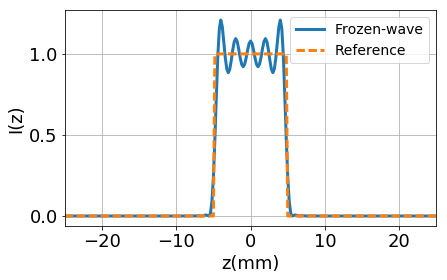

In [7]:
z = np.linspace(-L/2, L/2, 251)

fig_num += 1
plt.figure(fig_num, figsize=(4*1.618, 4))

plt.plot([z*1e3 for z in z], [vfw.intensity(0, 0, z) for z in z], lw=3, label='Frozen-wave')
plt.plot([z*1e3 for z in z], [vfw.reference_function(z)**2 for z in z], '--', lw=3, label='Reference')
plt.legend(fontsize=12, loc=1)
plt.xlim([-L/2*1e3, L/2*1e3])
plt.legend(fontsize=14, loc=1)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.xlabel(r'z(mm)', fontsize=18)
plt.ylabel('I(z)', fontsize=18)
plt.grid()
plt.tight_layout()
plt.savefig('LIP-const-perfil-2D.png',  dpi=300)
plt.show()

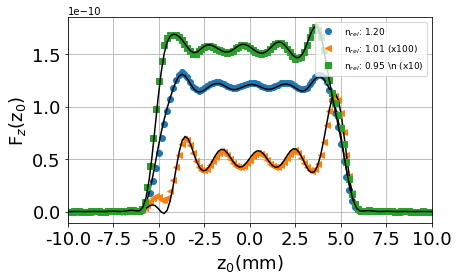

In [13]:
# LIP Frozen Wave longitudinal forces
fig_num += 1
plt.figure(fig_num, figsize=(4*1.618, 4))

emtdata = pd.read_csv('EMTheoryData-lip-const-fw.csv', index_col=0)
factor = 11.0

ptc = SphericalParticle()
ptc.radius = 20e-6
ptc.medium_refractive_index = 1.33

beam_pos = (0, 0, 0)

paramx = {'param': 'beam_pos_z',
          'start': -2*L/10,
          'stop': 2*L/10,
          'num': 80,}

ptc.refractive_index = 1.2*1.33
X1, F1 = ptc.geo_opt_force(vfw, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f' % (ptc.refractive_index/1.33)
plt.plot(X1, [1*f for f in F1], 'o', label=label)
plt.plot(emtdata.index, [data*factor for data in emtdata['120']], color='k')

ptc.refractive_index = 1.01*1.33
X2, F2 = ptc.geo_opt_force(vfw, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f (x100)' % (ptc.refractive_index/1.33)
plt.plot(X2, [100*f for f in F2], '<', label=label)
plt.plot(emtdata.index, [data*factor*100 for data in emtdata['101']], color='k')

ptc.refractive_index = 0.95*1.33
X3, F3 = ptc.geo_opt_force(vfw, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f (x10)' % (ptc.refractive_index/1.33)
plt.plot(X3, [10*f for f in F3], 's', label=label)
plt.plot(emtdata.index, [data*factor*10 for data in emtdata['095']], color='k')

plt.xlim([-0.2*L, 0.2*L])

xlocs, xlabs = plt.xticks()
plt.xticks(xlocs, [xl*1e3 for xl in xlocs])

plt.legend(fontsize=9, loc=1)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.xlabel(r'z$_0$(mm)', fontsize=18)
plt.ylabel(r'F$_z$(z$_0$)', fontsize=18)
plt.grid()
plt.tight_layout()
plt.savefig('LIP-const-longit-forces.png',  dpi=300)

plt.show()